#Guia de trabajo Deepface.

Elaborado por Juan Andres Bueno Hortua

Dirección de Tecnologias de innovación
Banco Davivivienda

2023 - I



Deepface es un paquete enfocado al trabajo con rostros, permite el analisis de expresiones y atributos faciales. 

El presente cuaderno planea ilustrar el uso de las distintas funcionalidades de la libreria. 



# 0) Instalación y configuración
Primero instalamos el paquete con el que trabajaremos, google colaboratory cuenta con un entorno en el que previamente fueron instaladas, sin embargo deepface no se encuentra entre ellas, por ello el siguiente comando permite la instalación de la libreria. Es un comando estandar de consola pero se inicia con un ! por estar en google colab.



In [ ]:
!pip install deepface mediapipe



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116952 sha256=6d8efd60ca69685253160c0ba051587d2cfe222e2235d9ea7b9d2f002ad719f0
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


Posteriormente importaremos las librerias que usaremos

- Deepface para el trabajo con rostros.
- OpenCV para el trabajo con imagenes.
- Numpy trabajo con arregos y numeros.
- Matplotlib hacer mejores graficos

In [ ]:
from deepface import DeepFace
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd




Directory  /root /.deepface created
Directory  /root /.deepface/weights created


## 0.1. Subir archivos de prueba
Ahora subieremos algunas imagenes de prueba donde probaremos el paquete instalado.
Para ello en el menu izquierdo, seleccione la carpeta, luego "subir al almacenamiento de la sesión", esto abrira una instancia de navegor de archivos,  escoja una imagen con un rostro.

Una subida la imagen de prueba la cargamos y visualizamos

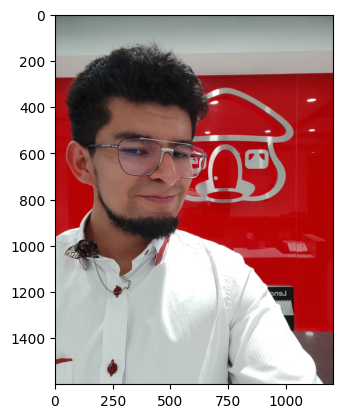

In [ ]:
img = cv2.imread('test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 1) Entendimiento del problema

Normalmente el trabajo con rostros implica 2 etapas.

- Detección: Antes de poder analizar los rostros de una imagen y la información de los mismos primero es necesario indentificar los rostros que se encuentran en encuentran en al imagen, esta etapa hace referencia a la extracción de rostros de la  imagen. Para ello se usan distintos detectores ya preentrenados que son capaces de identificar los rostros que se encuentran en una imagen dada.

- Parametrización: El siguiente paso es convertir el rostro detectado en una representación que  permita compararlo con otro. Para ello se usa un modelo que toma como entrada un rostro(es decir una imagen) y la convierte en representación vectorial de la misma.



# 2) Detección de Rostros



##2.1 Selección del detector

Deepface permite escoger el detector con el que se extraeran los rostros, estos son: 
- OpenCV 
- SSD
- Dlib 
- MTCNN
- RetinaFace 
- MediaPipe

Para cambiar el detector facilmente a lo largo de la ejecución de este cuaderno, crearemos un arreglo llamado "detectors" donde almaceremos los diferentes detectores disponibles, asi con detectors[i] indicaremos cualquiera de los detectores disponibles.

In [ ]:
detectors = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'retinaface', 
  'mediapipe'
]

A continución presentamos las detecciones de cada uno de los detectores en nuestra imagen de prueba.

### OpenCV
Para cada detector se indica como hacer la detección y se muestra la detección realizada

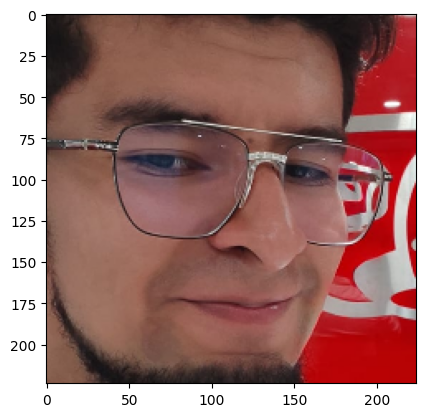

In [12]:
#%%timeit   #Permite medir el tiempo de ejecución de la celda varias veces y su desviación estandar
cara_opencv =DeepFace.extract_faces(img,  # El primer parametro es la imagen de entrada
        target_size = (224, 224),         # Target _size es el tamaño de la detección resultante o el rostro a detectar
        detector_backend = detectors[0])  # detector backend permite seleccionar el detector con el que se buscaran los rostros
                                          # Con la pocisión en el arrelgo indicamos el detector que queremos usar
                                          # que es equivalente a: detector_backend = 'opencv'
#El resultado es un arreglo de detecciones
plt.imshow(cara_opencv[0]['face'])        #Accedemos a la pocisión 0 de ese arreglo y usamos 'Face' qe nos permite acceder
                                          # a la imagen del rostro extraido

Este proceso lo repetimos para cada uno de los detectores

### SSD
Con ssd presentamos una detección en la imagen de test y esta es la cara detectada

deploy.prototxt will be downloaded...


Downloading...
From: https://github.com/opencv/opencv/raw/3.4.0/samples/dnn/face_detector/deploy.prototxt
To: /root/.deepface/weights/deploy.prototxt
28.1kB [00:00, 16.3MB/s]                   


res10_300x300_ssd_iter_140000.caffemodel will be downloaded...


Downloading...
From: https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
To: /root/.deepface/weights/res10_300x300_ssd_iter_140000.caffemodel
100%|██████████| 10.7M/10.7M [00:00<00:00, 192MB/s]


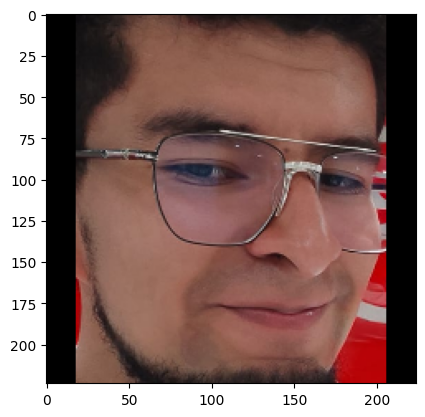

In [6]:
#%%timeit
cara_ssd =DeepFace.extract_faces(img_path = "test.jpg",  #Tambien es posible importar directamente sin declararla antes usando la 
        target_size = (224, 224),                        # ruta de la imagen
        detector_backend = detectors[1])

plt.imshow(cara_ssd[0]['face'])

### DLIB
Con dlib presentamos una detección en la imagen de test y esta es la cara detectada

shape_predictor_5_face_landmarks.dat.bz2 is going to be downloaded


Downloading...
From: http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
To: /root/.deepface/weights/shape_predictor_5_face_landmarks.dat.bz2
100%|██████████| 5.71M/5.71M [00:01<00:00, 3.76MB/s]


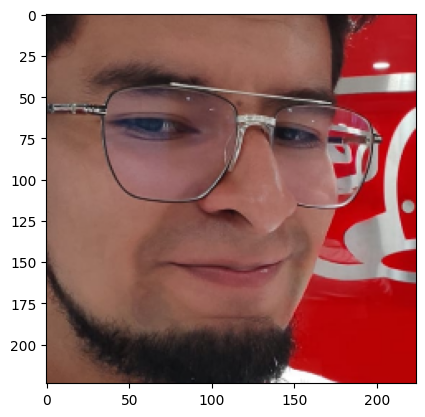

In [7]:
#%%timeit
cara_dlib =DeepFace.extract_faces(img_path = "test.jpg", 
        target_size = (224, 224), 
        detector_backend = detectors[2])
plt.imshow(cara_dlib[0]['face'])

### mtcnn
Con mtcnn presentamos dos detecciones en la imagen de test y esta es la cara detectada

1/1 [==============================] - 0s 167ms/step


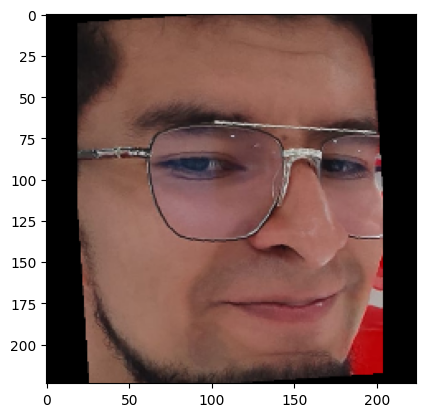

In [8]:
#%%timeit
cara_mtcnn =DeepFace.extract_faces(img_path = "test.jpg", 
        target_size = (224, 224), 
        detector_backend = detectors[3])
plt.imshow(cara_mtcnn[0]['face'])

### RetinaFace
Con RetinaFace presentamos una detección en la imagen de test y esta es la cara detectada

retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:01<00:00, 73.8MB/s]


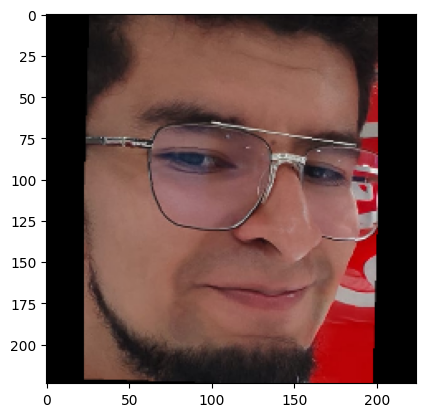

In [9]:
#%%timeit
cara_retinaface =DeepFace.extract_faces(img_path = "test.jpg", 
        target_size = (224, 224), 
        detector_backend = detectors[4])
plt.imshow(cara_retinaface[0]['face'])

### Mediapipe
Con mediapipe presentamos una detección en la imagen de test y esta es la cara detectada

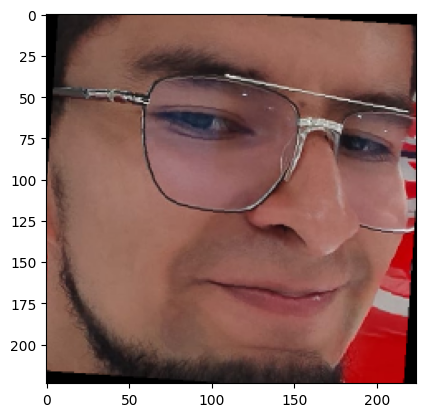

In [10]:
#%%timeit
cara_mediapipe =DeepFace.extract_faces(img_path = "test.jpg", 
        target_size = (224, 224), 
        detector_backend = 'mediapipe')
plt.imshow(cara_mediapipe[0]['face'])

## 2.2 Resultados 
A continuación realizamos un subplot con cada una de las detecciones realizadas con los diferentes detectores para compararlas.

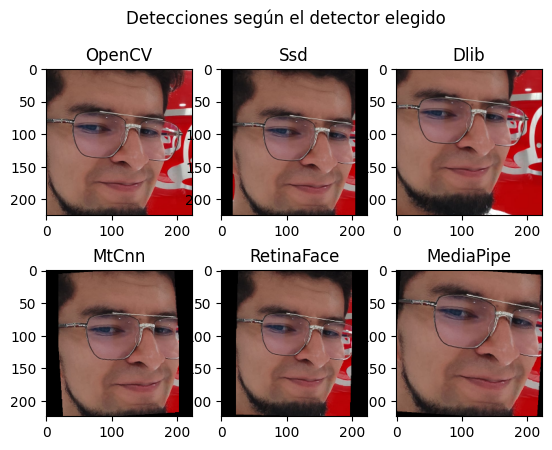

In [13]:
fig, axs = plt.subplots(2, 3)
for i in range(2):
    for j in range(3):
        ax = axs[i,j]
        if i == 0 and j == 0:
            ax.imshow(cara_opencv[0]['face'])
            ax.set_title('OpenCV')
        elif i == 0 and j == 1:
            ax.imshow(cara_ssd[0]['face'])
            ax.set_title('Ssd')
        elif i == 0 and j == 2:
            ax.imshow(cara_dlib[0]['face'])
            ax.set_title('Dlib')
        elif i == 1 and j == 0:
            ax.imshow(cara_mtcnn[0]['face'])
            ax.set_title('MtCnn')
        elif i == 1 and j == 1:
            ax.imshow(cara_retinaface[0]['face'])
            ax.set_title('RetinaFace')
        elif i == 1 and j == 2:
            ax.imshow(cara_mediapipe[0]['face'])
            ax.set_title('MediaPipe')
plt.suptitle('Detecciones según el detector elegido')
plt.show()

En este punto ya sabemos como elegir uno u otro detector según se desee o se requiera.

##2.3 Imagenes con varios rostros
 Cabe mencionar que DeepFace permite la detección de multiples rostros, para esto solo necesitamos una imagen con multiples rostros, cada rostro sera almacenado en un arreglo de detecciones

El siguiente codigo pemite capturar varios rostros en una imagen con varios rostros

In [14]:
img_vr = "grupal.jpg"  # Se indica una imagen con varios rostros

detecs = [] #Arreglo vacio para almacenar las detecciones

#Ajustes graficos
fuente = cv2.FONT_HERSHEY_SIMPLEX
tamano_fuente = 1.5
color = (0, 0, 0)  # color del texto en BGR (azul, verde, rojo)
grosor = 2

for detector in detectors:
  detecciones =DeepFace.extract_faces(img_vr, 
        target_size = (224, 224), 
        detector_backend = detector,
        enforce_detection= False)
  print( 'Detector: ' + detector + '  Caras Detectadas: ' + str(len(detecciones)) +'\n')
  caras=[] #Se almacenan las caras por cada detector

  #Creación de una imagen con el nombre del detector, para poder indicar a que detector corresponden las detecciones

  img = np.zeros((224, 224, 3), np.uint8)
  # Establecer el color de fondo en blanco
  img[:] = (255, 255, 255)

  # Escribir un texto en la imagen
  texto = detector
  # Obtener las dimensiones del texto
  (tamano_texto, _) = cv2.getTextSize(texto, fuente, tamano_fuente, grosor)[0]

  # Calcular las coordenadas del punto central de la imagen
  (x_centro, y_centro) = (img.shape[1] // 2, img.shape[0] // 2)

  # Calcular las coordenadas del punto superior izquierdo del texto
  (x_inicio, y_inicio) = (x_centro - (tamano_texto // 2), y_centro - 5)

  # Escribir el texto en la imagen
  cv2.putText(img, texto, (x_inicio, y_inicio), fuente, tamano_fuente, color, grosor)
  caras.append(img)

  #Se agregan todas las detecciones de un detector a caras
  for deteccion in detecciones:
    caras.append (deteccion['face']) 

  #Se agrara caras a un arreglo mas grande para crear una matriz
  detecs.append(caras)

Detector: opencv  Caras Detectadas: 7

Detector: ssd  Caras Detectadas: 4

Detector: dlib  Caras Detectadas: 6

2/2 [==============================] - 0s 22ms/step
Detector: mtcnn  Caras Detectadas: 6

Detector: retinaface  Caras Detectadas: 6

Detector: mediapipe  Caras Detectadas: 1



El siguiente codigo muestra los resultados obtenidos

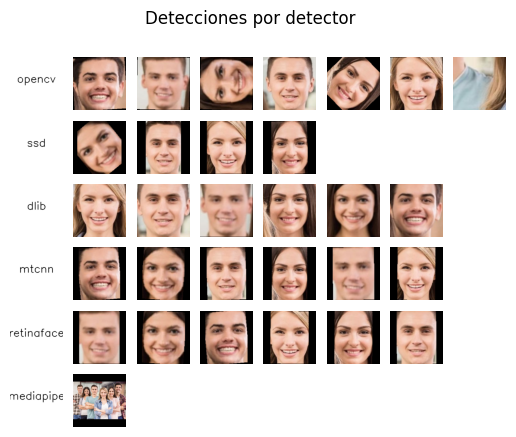

In [15]:
n= len(detectors) #filas, una por detector
m = len(max(detecs, key=len)) # columnas, numero maximo de detecciones en todos los detectores
fig, axs = plt.subplots(n, m ) # Se declara  el tamaño de la matriz

for i in range(n):
    for j in range(len(detecs[i])):
      ax = axs[i,j]
      ax.imshow(detecs[i][j])

for ax in axs.flat: #Se eliminan los ejes 
    ax.axis('off')


plt.suptitle('Detecciones por detector') # Se configura el titulo de la figura
plt.show()

#3) Codificación del rostro.

Deepface permite trabajar con varios modelos, es decir que puede puede usarlos o configurarlos a voluntad segun requiera o desee para las diferentes operaciones que permite realizar deepface. Los modelos que puede usar son:

- VGG-Face 
- Facenet 
- Facenet512 
- OpenFace 
- DeepFace 
- DeepID 
- ArcFace 
- Dlib 
- SFace

De manera identica a lo realizado con los detectores, creamos un arreglo con los distintos modelos para acceder a ellos facilmente  a lo largo de la guia.



In [16]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]

Para usar cualquiera de los modelos se declara el parametro "model_name" y se le da como entrada uno de los elementos de la lista anterior, que corresponde a los posibles modelos a usar, el modelo por default es  "VGG-Face"


Para hacer la vecotrización o codificación del rostro se emplea el siguiente codigo

El tamaño de la vectorización es: 2622


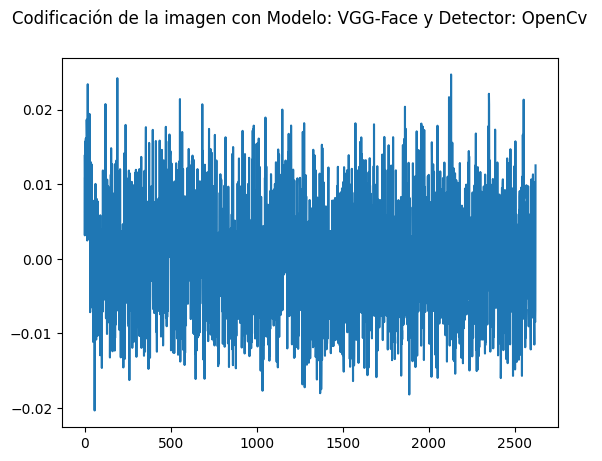

In [20]:
embedding_objs = DeepFace.represent( img_path= "test.jpg",   # Indicamos la imagen  de entrada
                                    model_name= models[0],   # "model_name" indica el modelo a usar, 
                                                             #equivalente a model_name = 'VGG-Face'
                                                            # tambien es posible configurar el detector, por defecto se usa "opencv"
                                    )   

plt.suptitle('Codificación de la imagen con Modelo: VGG-Face y Detector: OpenCv ') #Declara el titulo de la figura
plt.plot(embedding_objs[0]["embedding"])      # Realiza el grafico
print('El tamaño de la vectorización es: ' + str(len(embedding_objs[0]["embedding"])))   #Imprime el tamaño de la  vectorización   


arcface_weights.h5  will be downloaded to  /root/.deepface/weights/arcface_weights.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: /root/.deepface/weights/arcface_weights.h5
100%|██████████| 137M/137M [00:02<00:00, 63.6MB/s]


El tamaño de la vectorización es: 512


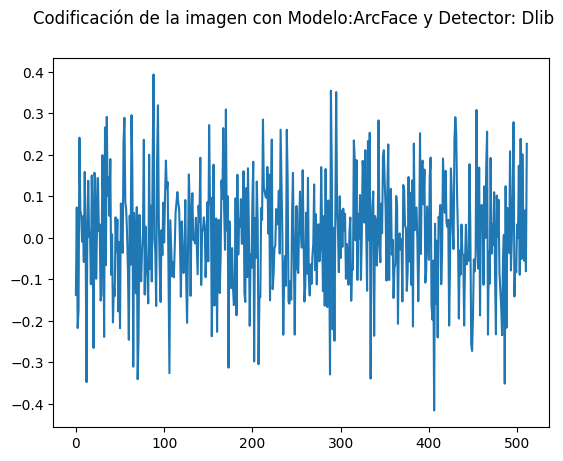

In [19]:
embedding_objs = DeepFace.represent( img_path= "test.jpg",
                                    model_name= "ArcFace",
                                    detector_backend = detectors[2])  #Ejemplo de como cambiar el detector
plt.suptitle('Codificación de la imagen con Modelo:ArcFace y Detector: Dlib')
plt.plot(embedding_objs[0]["embedding"])
print('El tamaño de la vectorización es: ' + str(len(embedding_objs[0]["embedding"]))) 


Podemos ver que cada modelo tiene un numero distinto de parametros y un rango (valores que pueden tener los elementos del vector) diferentes.

A continuación se muestra un resumen de esta información

|   Modelo   | Tamaño Vectorización | Peso Modelo (MB) |
|:----------:|:--------------------:|:----------------:|
| VGG-Facess |         2622         |        580       |
|   Facenet  |          128         |        92        |
| Facenet512 |          512         |        95        |
|  OpenFace  |          128         |       15.3       |
|  DeepFace  |         4096         |        511       |
|   DeepID   |          160         |       43.5       |
|   ArcFace  |          512         |        137       |
|    Dlib    |           -          |       21.4       |
|    SFace   |        10 / 11       |       38.7       |

#4) Reconocimiento 
El proceso de reconocimiento es sencillo, lo que se hace es tomar dos imagenes como entradas, se buscan los rostros en ambas, se codifican y se calcula la distancia entre los mismos según una metrica( que como es de esperarse, se puede escoger)

Para esto suba una o varias imagenes con rostros que quiera comparar, en este punto se aconseja que cada iamgen solo contenga un rostro

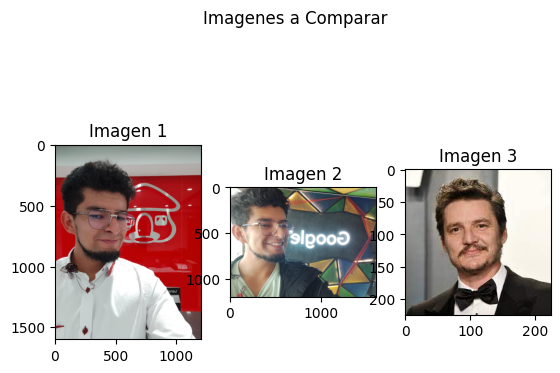

In [21]:
img_1 = cv2.imread('test.jpg')    # Se indica la ruta de la primera imagen
img_2 = cv2.imread('test2.jpeg')  # Se indica la ruta de la segunda imagen
img_3 = cv2.imread('pedro.jpg')  # Se indica la ruta de una tercera imagen, en esta usaremos un rostro diferente


fig, axs = plt.subplots(1, 3)

ax = axs[0]
ax.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
ax.set_title('Imagen 1')

ax = axs[1]
ax.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
ax.set_title('Imagen 2')

ax = axs[2]
ax.imshow(cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB))
ax.set_title('Imagen 3')



plt.suptitle('Imagenes a Comparar')
plt.show()

##4.1) Misma Persona
Vamos a comparar las dos primeras imagenes que contienen a la misma persona

In [22]:
result = DeepFace.verify(img_1,                # Indicamos la primera Imagen
                         img_2,                # Indicamos la segunda Imagen
                         detector_backend=detectors[1],   # Indicamos el detector que queremos usar / Opcional
                         model_name = models[0]           # Indicamos el modelo que queremos usar /Opcional
                         ) 

result


{'verified': True,
 'distance': 0.32054228159706255,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'ssd',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 160, 'y': 368, 'w': 445, 'h': 528},
  'img2': {'x': 165, 'y': 212, 'w': 459, 'h': 561}},
 'time': 1.79}

Se deberia tener una salida similar a: 

In [ ]:
{'verified': True,
 'distance': 0.32054228159706255,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'ssd',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 160, 'y': 368, 'w': 445, 'h': 528},
  'img2': {'x': 165, 'y': 212, 'w': 459, 'h': 561}},
 'time': 2.89}

Este es un resumen de los resultado y parametros usados para comparar ambas imagenes, en este paso se usa el detector SSD, y el modelo VGG, obtenemos que la disstancia entre ambas imagenes (usando la metrica de coseno) es 0.32, dado que es menor al threshold o limite para esta combinación métrica-modelo, se indica que la verificación es positiva, y la persona en las iamgenes es la misma.

## 4.2) Personas Diferentes 
Ahora compararemos las imagenes 2 y 3 que corresponden a personas diferentes.

In [23]:
result = DeepFace.verify(img_2, 
                         img_3, 
                         detector_backend=detectors[1]
                         )
result


{'verified': False,
 'distance': 0.480617910831603,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'ssd',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 165, 'y': 212, 'w': 459, 'h': 561},
  'img2': {'x': 56, 'y': 42, 'w': 90, 'h': 112}},
 'time': 1.68}

Podemos ver que en este caso el atributo verified es False, esto dado que la distancia es de 0.48, lo que es mayor al limite para esta combinación metrica-modelo que es de 0.4.

#5) Busqueda en directorio

In [27]:
img_b= "pedro.jpg"                       #Indicamos una iamgen que contenga el rostro de la persona que queremos buscar
results = DeepFace.find(img_b,          # Se indica la imagen a buscar
      db_path = "Faces",                # Se indica la carpeta donde buscaremos
      model_name = models[1],           # Se indica el modelo a usar / Opcional, VGG por dedecto
      detector_backend=detectors[1],
      enforce_detection= False          # Se indica el detector a usar / Opcional, OpenCV por dedecto
)
results

There are  20  representations found in  representations_facenet.pkl
find function lasts  0.25618648529052734  seconds


[       identity  source_x  source_y  source_w  source_h  Facenet_cosine
 0  Faces/2a.jpg        56        42        90       112        0.000000
 1  Faces/2b.jpg        56        42        90       112        0.329022]

#6) Selección de metricas

Para la busqueda en directorio y la verificación o comparación de rostros es posible cambiar la metrica que evalua la distancia entre las respresentaciones, hasta el momento se ha usado el valor por defecto, es decir la similitud coseno (Cosine)

Sin embargo es posible usar otras dos metricas:

- Distancia euclidiana 
- Distancia euclidiana Normalizada

 Para ello crearemos un arreglo con las distintas metricas

In [29]:
metrics = [
    
    'cosine',
    'euclidean',
    'euclidean_l2' ] 

Para seleccionar una metrica basta con usar el parametro 'similarity_metric', a continuación se presenta un ejemplo

In [32]:
result = DeepFace.verify(img_1,                # Indicamos la primera Imagen
                         img_2,                # Indicamos la segunda Imagen
                         detector_backend=detectors[2],   # Indicamos el detector que queremos usar / Opcional
                         model_name = models[1],           # Indicamos el modelo que queremos usar /Opcional
                         distance_metric = metrics[2]      # Indicamos la metrica a usar
                         ) 

result

{'verified': False,
 'distance': 0.8964512930674211,
 'threshold': 0.8,
 'model': 'Facenet',
 'detector_backend': 'dlib',
 'similarity_metric': 'euclidean_l2',
 'facial_areas': {'img1': {'x': 194, 'y': 451, 'w': 462, 'h': 462},
  'img2': {'x': 245, 'y': 246, 'w': 462, 'h': 462}},
 'time': 3.68}

#7) Análisis de atributos faciales

Deepface Permite el analisis de diferentes atributos y con esto lograr estimar las siguientes variables:
- Edad.
- Genero.
- Emoción.
- Raza.

Para hacer un analiss se debe seleccionar la imagen a analizar y elegir que modelos o "acciones" se quieren aplicar. Cada acción se asocia a una de las variables mencionadas anteriormente, para ejecutar el modelo correspondiente sobre la imagen, se debe incluir dentro de un arreglo. Luego este arreglo se pasa a la función y se realizan todas las acciones indicadas

In [33]:
actions_r=['age', 'gender', 'emotion', 'raze']      # Indicamos las acciones a realizar
analisis = DeepFace.analyze(img_path= "test.jpg",   # Indicamos la imagen que analizaremos
                            actions=actions_r,      # Indicamos las acciones a realizar
                            detector_backend = detectors[1] 
                            ) 

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 82.3MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:07<00:00, 73.2MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:08<00:00, 63.2MB/s]
Action: raze: 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]


In [34]:
analisis

[{'age': 34,
  'region': {'x': 160, 'y': 368, 'w': 445, 'h': 528},
  'gender': {'Woman': 3.5714250057935715, 'Man': 96.42857313156128},
  'dominant_gender': 'Man',
  'emotion': {'angry': 78.03442943301377,
   'disgust': 0.0005738243886354714,
   'fear': 2.0223939134117312,
   'happy': 4.533291630281201e-05,
   'sad': 19.299734789117263,
   'surprise': 7.413091915861416e-07,
   'neutral': 0.6428263067648594},
  'dominant_emotion': 'angry'}]

El siguiente codigo permite ver como varian los resultados segun el detector empleado

In [35]:
analisis_r= []
i=0
for detector in detectors:
  analisis = DeepFace.analyze(img_path= "test.jpg", actions=['age', 'gender', 'emotion', 'raze'], detector_backend = detector)
  if detector == 'opencv':
    analisis_r.append(analisis[0])
  else:
    analisis_r.append(analisis[0])
  
  


Action: raze: 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]


1/1 [==============================] - 0s 44ms/step


Action: raze: 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]


In [36]:
records = []

for record in analisis_r:
    record_dict = {}
    record_dict['age'] = record['age']
    record_dict['region_x'] = record['region']['x']
    record_dict['prob_mujer'] = record['gender']['Woman']
    record_dict['prob_hombre'] = record['gender']['Man']
    record_dict['genero_dominante'] = record['dominant_gender']
    record_dict['rabia'] = record['emotion']['angry']
    record_dict['disgusto'] = record['emotion']['disgust']
    record_dict['miedo'] = record['emotion']['fear']
    record_dict['felicidad'] = record['emotion']['happy']
    record_dict['tristeza'] = record['emotion']['sad']
    record_dict['sorpresa'] = record['emotion']['surprise']
    record_dict['neutro'] = record['emotion']['neutral']
    record_dict['emmoción_dominante'] = record['dominant_emotion']
    records.append(record_dict)

df = pd.DataFrame(records)

In [37]:
df.insert(0, 'detector', detectors)
df

,detector,age,region_x,prob_mujer,prob_hombre,genero_dominante,rabia,disgusto,miedo,felicidad,tristeza,sorpresa,neutro,emmoción_dominante
0,opencv,29,177,0.958510,99.041486,Man,22.951107,1.430482,30.241339,0.008403,38.218682,1.126919e-02,7.138719,sad
1,ssd,34,160,3.571425,96.428573,Man,78.034429,0.000574,2.022394,0.000045,19.299735,7.413092e-07,0.642826,angry
2,dlib,37,194,3.167378,96.832621,Man,9.074863,1.848209,25.439748,0.007589,16.487025,7.902883e-04,47.141770,neutral
3,mtcnn,37,171,2.670087,97.329909,Man,48.820347,0.018777,10.922063,0.011084,33.465539,5.130377e-04,6.761666,angry
4,retinaface,39,174,3.389422,96.610582,Man,8.278047,0.628110,24.502839,0.002841,63.411212,2.986841e-03,3.173964,sad
5,mediapipe,41,161,5.648915,94.351089,Man,0.841986,0.000203,0.227327,3.040731,3.167981,8.712563e-05,92.721689,neutral
